# **----- MACHINE LEARNING GÜN 3**

# **1)  6 - MSE , RMSE , MAE , MAPE  Nedir ? Makine Öğrenmesi Hata Metrikleri**

In [ ]:

import pandas as pd

from sklearn.linear_model import LinearRegression

import numpy as np

from sklearn.metrics import mean_squared_error , mean_absolute_error , mean_absolute_percentage_error

In [ ]:
df = pd.read_csv("sağlık.csv")
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [ ]:
df = pd.get_dummies(df , columns = ["sex" , "smoker" , "region" ], drop_first=True , dtype=int)


In [ ]:
df.head(3)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0
2,28,33.00,3,4449.4620,1,0,0,1,0


In [ ]:
y = df[["charges"]]

x = df.drop("charges" , axis=1)

In [ ]:
lm = LinearRegression()
model = lm.fit(x,y)

In [ ]:
model.score(x,y)

0.7509130345985207

In [ ]:

model.predict([[19,27.90,0,0,1,0,0,1]])

# tablodaki 1. satırda olan verileri girdiğimizde çıkan 25.293 sonucu ile tablodaki
# charges 16.884 çıkan sonuç aynı dğeil aynı veriler olmasına rağmane


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[25293.7130284]])

In [ ]:
df_hata = pd.DataFrame()

In [ ]:
df_hata["y"] = y

In [ ]:
y_tahmin = model.predict(x)
df_hata["tahmin"] = y_tahmin

In [ ]:
df_hata["error/fark"] = y - y_tahmin

In [ ]:
# MSE HATA
# hataların karesini alma mantığı ile çalışır
df_hata["squared_errors"] = df_hata["error/fark"] ** 2

In [ ]:
df_hata["abs_error"]=np.abs(df_hata["error/fark"])

In [ ]:
df_hata.head(5)

,y,tahmin,error/fark,abs_error
0,16884.92400,25293.713028,-8408.789028,8408.789028
1,1725.55230,3448.602834,-1723.050534,1723.050534
2,4449.46200,6706.988491,-2257.526491,2257.526491
3,21984.47061,3754.830163,18229.640447,18229.640447
4,3866.85520,5592.493386,-1725.638186,1725.638186


In [ ]:
df_hata["percent_error"] = np.abs((y-y_tahmin)/y) *100

In [ ]:
df_hata.head()

,y,tahmin,error/fark,abs_error,percent_error
0,16884.92400,25293.713028,-8408.789028,8408.789028,49.800574
1,1725.55230,3448.602834,-1723.050534,1723.050534,99.855017
2,4449.46200,6706.988491,-2257.526491,2257.526491,50.737066
3,21984.47061,3754.830163,18229.640447,18229.640447,82.920534
4,3866.85520,5592.493386,-1725.638186,1725.638186,44.626398


In [ ]:
df_hata.mean()

,0
y,1.327042e+04
tahmin,1.327042e+04
error/fark,2.289371e-12
abs_error,4.170887e+03
percent_error,4.203527e+01


In [ ]:
# bunlar ile uğraşmamak için daha kısa yolları olan modül uzantısı var sklearn ün

from sklearn.metrics import mean_squared_error , mean_absolute_error , mean_absolute_percentage_error

In [ ]:
mean_squared_error(y , y_tahmin)

36501893.00741544

In [ ]:
mean_absolute_error(y , y_tahmin)

4170.886894163586

In [ ]:
mean_absolute_percentage_error(y,y_tahmin)

# **2) - Overfitting , Underfitting , Balanced Fitting Nedir ? Makine Öğrenmesi**

In [ ]:
# underfitting = az öğrenme
# overfitting = aşırı öğrenme
# balanced fiting = gerekli öğrenme

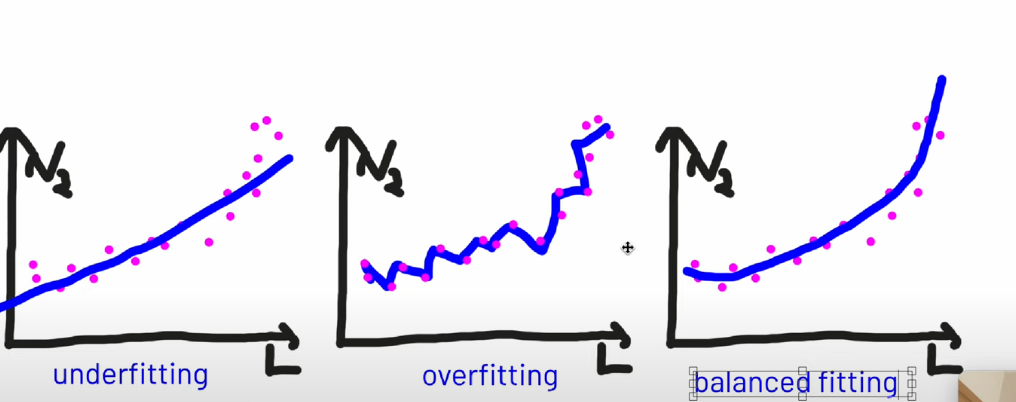

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [ ]:
df = sns.load_dataset("diamonds")

In [ ]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [ ]:
df = pd.get_dummies(df , columns = ["cut" , "color" , "clarity"], drop_first=True , dtype=int)

In [ ]:
df.head(3)

,carat,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_E,color_F,color_G,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
y = df[["price"]]
x = df.drop("price" , axis=1)

In [ ]:
x_train , x_test , y_train , y_test =train_test_split(x , y , random_state=19 , train_size=0.76)

In [ ]:
lm = LinearRegression()
model = lm.fit(x_train , y_train)

In [ ]:
model.score(x_test , y_test)

0.92006452446344

In [ ]:
model.score(x_train , y_train)

0.9196844286376016

In [ ]:
# test ile train x ve y leri arasındaki score ne kadar az ise o kadar uyumlu öğrenmiştir

# ne kadar fark varsa o kadar çok öğrenmiştir


# **Ridge Regresyon (L2) Nedir Formül Özellikleri**


In [ ]:
# Ridge regresyon overfitting (aşırı öğrenme durumu) için kullanılır .

# Ridge regresyon sayesinde bias ve varyans a rasındaki dengeyi sağlayabiliriz .

# Ridge regresyonda katsayılar üzerinde regülasyon yapılıyor .

# ridge regresyonda katsayılar küçülür ama sıfır olmaz features öz nitelik azalmaz .

# ridge regresyon cezalar karesi ile orantılı .

# ridge regresyon 12 .

y = a1 * x1 + a2 * x2 + ..... alfa * (katsayılar toplamı) **2

alfanın düşük olduğu bir denklemde yada doğruda katsayıların Y ye etkisi daha çoktur

50 = a1 * x1 + alfa ( alfa = 30 olursa , x1 = 5 olduğunda a1 4 olur)

50 = a1 * x1 + alfa ( alfa = 10 olursa , x1 = 5 olduğunda a1 8 olur)

alfa arttıkça katsayılar küçülmek zorunda kalır

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,Ridge

In [6]:
df = pd.read_csv("Student.csv")
df.head(3)

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811


In [7]:
y=df["Marks"]

x=df[["time_study"]]

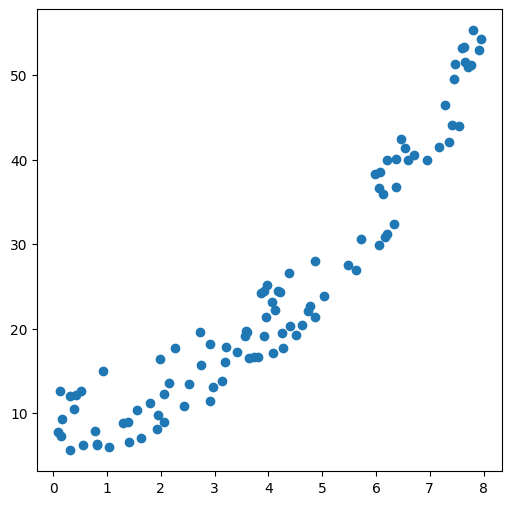

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.show()

In [9]:
lr = LinearRegression()
model =lr.fit(x,y)
model.score(x,y)

0.8878423939061949

In [18]:
alfalar = [10,200,1000,10000]

for a in alfalar:
  r = Ridge(alpha = a)

  modelr = r.fit(x , y)

  sonuc = modelr.score(x , y)
  print(sonuc)

  print(modelr.coef_)
  print("----------------")

# ALFA ARTTIKÇA KATSAYILAR AZALIR

0.8875666577020126
[5.58849778]
----------------
0.8259413810656739
[4.18665397]
----------------
0.5218159768270582
[2.03612484]
----------------
0.09128235230143567
[0.30037062]
----------------


# **3) Logistic Regresyon (Sınıflandırma)**

In [ ]:
# Logistic Regresyon formülü

# denklem her zaman 0 ile 1 arasında soonuç verir

# üstteki e üstlü sayıya a denirse formül

# a / a + 1 oluyo 1 da hiç a + 1 den büyük olmadığı için 0 ile 1 arasında kalıyor

# sınıflandırma türüdür

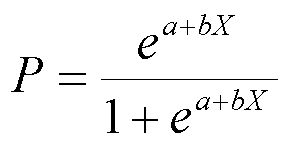

In [24]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [29]:
df = pd.read_csv("kart.csv")
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [30]:
y = df["default.payment.next.month"]

x = df.drop("default.payment.next.month" , axis = 1)

In [32]:
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.77 , random_state=6) # 6 nın bir önemi yok

In [34]:
log = LogisticRegression()
model = log.fit(x_train , y_train)
model.score(x_test,y_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7740579710144928

In [35]:
denemex = np.array(x.iloc[1903])

model.predict([denemex])

# 0 ödememiş anlamına geliyor

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [36]:
y.iloc[1903]

np.int64(0)